https://pydicom.github.io/pydicom/stable/old/viewing_images.htmls

In [3]:
# !pip install pydicom

  Using cached pydicom-2.3.0-py3-none-any.whl (2.0 MB)


In [1]:
import pydicom
from pydicom.data import get_testdata_files, get_testdata_file

In [39]:
import matplotlib.pyplot as plt
from pydicom import dcmread
# filename = get_testdata_file("./1-01.dcm")
filename = "1-01.dcm"
# print("filename = ", filename)
ds = dcmread(filename)
# ds.pixel_array.shape
ds.pixel_array
ds.BitsAllocated
# plt.imshow(ds.pixel_array, "gray")#cmap=plt.cm.bone)
# plt.cm.cmaps_listed

16

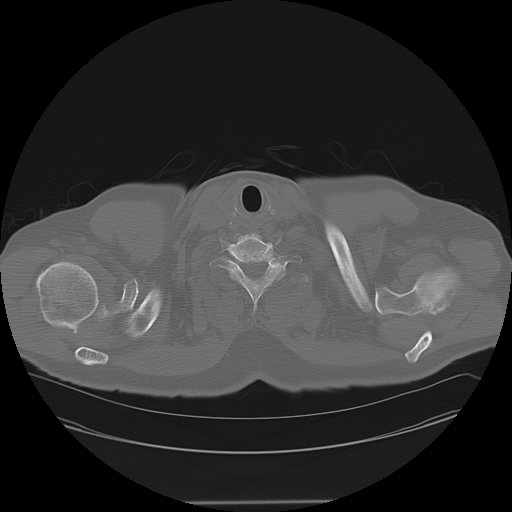

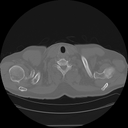

In [32]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import minmax_scale

# pil_image = Image.fromarray(ds.pixel_array, 'I')\
shape = ds.pixel_array.shape
new_array = minmax_scale(ds.pixel_array.flatten(), feature_range=(0,255))

new_array2 = new_array.reshape(shape).astype(dtype=np.int8)
# .astype(dtype=np.uint8, casting='unsafe')
pil_image = Image.fromarray(new_array2, 'L')
# pil_image = Image.fromarray(np.uint8(ds.pixel_array),mode="L")
display(pil_image)
pil_image.thumbnail((128, 128), Image.Resampling.LANCZOS)
display(pil_image)
# pil_image.save("test_img.png")

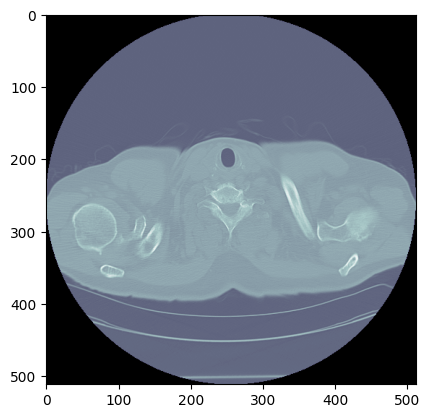

In [36]:
import matplotlib.pyplot as plt
# filename = get_testdata_file("1-01.dcm")
ds = pydicom.dcmread("1-01.dcm")
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

# Сборка функции

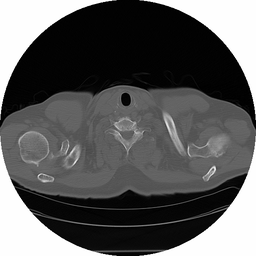

In [42]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import minmax_scale
import pydicom
from pydicom import dcmread
from pydicom.data import get_testdata_files, get_testdata_file

def make_dicom_thumbnail(filename:str, size:tuple) -> Image:
    """
    Сохраняет уменьшенное чёрно-белое изображение для предпросмотра
    из файла формата  DICOM, содержащего чёрно-белое 8- или 16-битное изображение

    Args:
        filename (str): путь к файлу DICOM
        size (tuple): кортеж с размерами создаваемой уменьшенной копии, например (128, 128)

    Returns:
        PIL.Image: изображение в формате объекта  PIL.Image или None, сохраняется в файл
        с помощью метода save("имя_файла")
    
    Примеры:
        filename = "1-01.dcm"
        display(make_dicom_thumbnail(filename=filename, size=(256, 256)))
        make_dicom_thumbnail(filename=filename, size=(256, 256).save("test_img.png")
    """
    
    try:
        ds = dcmread(filename)
        orig_shape = ds.pixel_array.shape
        ds.pixel_array[ds.pixel_array < 0] = ds.pixel_array.max()
        normalized_array = minmax_scale(ds.pixel_array.flatten(), feature_range=(0,255))
        uint8_array = normalized_array.reshape(orig_shape).astype(dtype=np.uint8)
        pil_image = Image.fromarray(uint8_array, 'L')
        pil_image.thumbnail(size, Image.Resampling.LANCZOS)
        return pil_image
    except:
        return None

filename = "1-01.dcm"
display(make_dicom_thumbnail(filename=filename, size=(256, 256)))
make_dicom_thumbnail(filename=filename, size=(256, 256)).save("test_img.png")